In [1]:
import pandas as pd
import os



In [2]:
control = ["QX01983","QX01981_160316090220","QX01867","QX01870","QX01873"]
RA = ["QX01860","QX01863","QX01866","QX01869","QX01872"]

In [3]:
def is_oxidized(str):
    if not pd.isna(str):
        if "[35]Oxidation" in str or "[35]oxidation" in str:
            return True
        else:
            return False
    else: 
        return False

In [4]:
import re
def get_protein_name(str):
    pat = re.compile(r"(.*)\(\(.*\)\)\(\(")
    match = re.match(pat, str).group(1)
    return match

In [5]:
result = get_protein_name("IPO5_HUMAN((60-68))((O00410))")

In [6]:
base = "/home/robbe/ionbot/ionbot_0.9.5/PXD014381/ionbot_files"
oxidized_prots = {}
PSMcounts = {}
for i in RA:
    first = pd.read_csv(base + "/" + i + "/ionbot.first.csv")
    first_nonshared = first[~(first["proteins"].str.contains("|", regex=False)) & (first["database"] == "T")]
    first_nonshared["protein_name"] = first_nonshared["proteins"].apply(get_protein_name)
    first_nonshared["is_oxidized"] = first_nonshared["modifications"].apply(is_oxidized)
    oxidized = first_nonshared[first_nonshared["is_oxidized"] == True]
    gmods = oxidized.groupby("protein_name").count().reset_index()
    gmods_oneplus = gmods[gmods["ionbot_match_id"] > 1]
    gfirst = first_nonshared.groupby("protein_name").count().reset_index()
    gfirst_oneplus = gfirst[gfirst["ionbot_match_id"] > 1]
    for index, row in gmods_oneplus.iterrows():
        protein = row["protein_name"]
        n_PSMs = row["ionbot_match_id"]
        if not "sp|" in protein:
            if not protein in oxidized_prots:
                oxidized_prots[protein] = n_PSMs
            else:
                oxidized_prots[protein] += n_PSMs
    for index, row in gfirst_oneplus.iterrows():
        protein = row["protein_name"]
        n_PSMs = row["ionbot_match_id"]
        if not "sp|" in protein:
            if not protein in PSMcounts:
                PSMcounts[protein] = n_PSMs
            else:
                PSMcounts[protein] += n_PSMs
    
resultdict = {}
for key in oxidized_prots:
    if key in PSMcounts:
        if PSMcounts[key] >= 5:
            resultdict[key] = oxidized_prots[key] / PSMcounts[key]

for i in control:
    first = pd.read_csv(base + "/" + i + "/ionbot.first.csv")
    first_nonshared = first[~(first["proteins"].str.contains("|", regex=False)) & (first["database"] == "T")]
    first_nonshared["protein_name"] = first_nonshared["proteins"].apply(get_protein_name)
    first_nonshared["is_oxidized"] = first_nonshared["modifications"].apply(is_oxidized)
    oxidized = first_nonshared[first_nonshared["is_oxidized"] == True]
    gmods = oxidized.groupby("protein_name").count().reset_index()
    gmods_oneplus = gmods[gmods["ionbot_match_id"] > 1]
    gfirst = first_nonshared.groupby("protein_name").count().reset_index()
    gfirst_oneplus = gfirst[gfirst["ionbot_match_id"] > 1]
    for index, row in gmods_oneplus.iterrows():
        protein = row["protein_name"]
        n_PSMs = row["ionbot_match_id"]
        if not "sp|" in protein:
            if not protein in oxidized_prots:
                oxidized_prots[protein] = n_PSMs
            else:
                oxidized_prots[protein] += n_PSMs
    for index, row in gfirst_oneplus.iterrows():
        protein = row["protein_name"]
        n_PSMs = row["ionbot_match_id"]
        if not "sp|" in protein:
            if not protein in PSMcounts:
                PSMcounts[protein] = n_PSMs
            else:
                PSMcounts[protein] += n_PSMs
    
controldict = {}
for key in oxidized_prots:
    if key in PSMcounts:
        if PSMcounts[key] >= 5:
            controldict[key] = oxidized_prots[key] / PSMcounts[key]

/tmp/ipykernel_592795/844124122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_nonshared["protein_name"] = first_nonshared["proteins"].apply(get_protein_name)
/tmp/ipykernel_592795/844124122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_nonshared["is_oxidized"] = first_nonshared["modifications"].apply(is_oxidized)
/tmp/ipykernel_592795/844124122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [7]:
resultcontrolleddict = {}
for key in resultdict:
    if key in controldict:
        resultcontrolleddict[key] = resultdict[key] / controldict[key]

In [8]:
resultdf = pd.DataFrame(resultdict.items(), columns=["Protein", "Oxidized_ratio"])

In [9]:
resultdfsorted = resultdf.sort_values("Oxidized_ratio", ascending=False).head(50)

In [10]:
resultdfsorted

,Protein,Oxidized_ratio
107,NPM_HUMAN,1.000000
79,ESTD_HUMAN,0.866667
89,HS904_HUMAN,0.666667
220,RAB1B_HUMAN,0.600000
125,RS15_HUMAN,0.571429
113,PPIA_HUMAN,0.500000
42,RL3_HUMAN,0.473684
71,CHTOP_HUMAN,0.466667
84,H31_HUMAN,0.428571
184,GET4_HUMAN,0.400000


In [11]:
proteinlist = resultdf["Protein"].to_list()
for i in proteinlist[0:51]:
    print(i)

1433E_HUMAN
ACLY_HUMAN
ACTN1_HUMAN
ATPA_HUMAN
ATPB_HUMAN
CAP1_HUMAN
DDX5_HUMAN
DHX15_HUMAN
DHX9_HUMAN
DPYL2_HUMAN
DPYL3_HUMAN
EF2_HUMAN
ENOA_HUMAN
FA98B_HUMAN
FAS_HUMAN
G3P_HUMAN
GANAB_HUMAN
GDIB_HUMAN
GDIR1_HUMAN
H4_HUMAN
HCFC1_HUMAN
HNRPL_HUMAN
HNRPM_HUMAN
HNRPU_HUMAN
HS90A_HUMAN
HS90B_HUMAN
HSP7C_HUMAN
HYOU1_HUMAN
IMB1_HUMAN
IQGA1_HUMAN
KPYM_HUMAN
LKHA4_HUMAN
MAP1B_HUMAN
METK2_HUMAN
MK01_HUMAN
NONO_HUMAN
NOP58_HUMAN
NUMA1_HUMAN
PGK1_HUMAN
PRKDC_HUMAN
PSD12_HUMAN
RAB14_HUMAN
RL3_HUMAN
ROA2_HUMAN
RS3_HUMAN
RTCB_HUMAN
RTL1_HUMAN
SFPQ_HUMAN
SMU1_HUMAN
SP16H_HUMAN
SYDC_HUMAN


In [12]:
resultcontroldf = pd.DataFrame(resultcontrolleddict.items(), columns=["Protein", "Control_Oxidized_ratio"])
resultcontroldfsorted = resultcontroldf.sort_values("Control_Oxidized_ratio", ascending=False)

In [13]:
resultcontroldfsorted[resultcontroldfsorted['Control_Oxidized_ratio'] > 1]

,Protein,Control_Oxidized_ratio
217,PSMD1_HUMAN,2.391304
163,CPT1A_HUMAN,2.350000
203,MCM4_HUMAN,2.225806
192,HS71A_HUMAN,2.210526
166,DDX17_HUMAN,2.185185
...,...,...
112,PHB2_HUMAN,1.038596
125,RS15_HUMAN,1.028571
143,XRCC6_HUMAN,1.006667
73,DPYL1_HUMAN,1.005376


In [14]:
resultcontroldfsorted

,Protein,Control_Oxidized_ratio
217,PSMD1_HUMAN,2.391304
163,CPT1A_HUMAN,2.350000
203,MCM4_HUMAN,2.225806
192,HS71A_HUMAN,2.210526
166,DDX17_HUMAN,2.185185
...,...,...
123,RL10_HUMAN,0.723333
177,FBRL_HUMAN,0.634615
262,MCM5_HUMAN,0.597222
109,PARP1_HUMAN,0.554622


In [15]:
proteinlist = resultcontroldfsorted["Protein"].to_list()
for i in proteinlist[0:123]:
    print(i)

PSMD1_HUMAN
CPT1A_HUMAN
MCM4_HUMAN
HS71A_HUMAN
DDX17_HUMAN
SF3B2_HUMAN
GCH1_HUMAN
COPB2_HUMAN
CH60_HUMAN
CKAP4_HUMAN
TERA_HUMAN
DSRAD_HUMAN
LMNB1_HUMAN
CYFP1_HUMAN
RL4_HUMAN
DDX5_HUMAN
SC31A_HUMAN
MCM7_HUMAN
MSH6_HUMAN
SMC1A_HUMAN
SYNC_HUMAN
SYMC_HUMAN
SYEP_HUMAN
NU133_HUMAN
PFKAP_HUMAN
NOP56_HUMAN
GTF2I_HUMAN
LPPRC_HUMAN
LMNA_HUMAN
HYOU1_HUMAN
SYIC_HUMAN
SND1_HUMAN
UGGG1_HUMAN
SEPT9_HUMAN
SERA_HUMAN
CAP1_HUMAN
USO1_HUMAN
EZRI_HUMAN
AT2A2_HUMAN
IPO9_HUMAN
MCM2_HUMAN
SYVC_HUMAN
IF2P_HUMAN
PRP8_HUMAN
NU107_HUMAN
EIF3B_HUMAN
MYH10_HUMAN
GCN1_HUMAN
AP2A1_HUMAN
FERM2_HUMAN
PYR1_HUMAN
SPTB2_HUMAN
MYH9_HUMAN
SRPRA_HUMAN
RIR1_HUMAN
SYLC_HUMAN
DYHC1_HUMAN
ABCE1_HUMAN
EF1G_HUMAN
CMC2_HUMAN
RTCB_HUMAN
PSA_HUMAN
AP2A2_HUMAN
GLYM_HUMAN
PSMD2_HUMAN
IPO4_HUMAN
HNRPQ_HUMAN
HDAC2_HUMAN
NNTM_HUMAN
TLN1_HUMAN
IPO5_HUMAN
SYAC_HUMAN
TRAP1_HUMAN
TKT_HUMAN
FLNB_HUMAN
TCPE_HUMAN
PRS4_HUMAN
EIF3D_HUMAN
MDHM_HUMAN
ACTN4_HUMAN
TCPH_HUMAN
TCPQ_HUMAN
HS904_HUMAN
SAE2_HUMAN
HSP74_HUMAN
RUVB2_HUMAN
FLOT1_HUMAN
PSMD3

In [16]:
GO_output = pd.read_csv("/home/robbe/ionbot/Project_analysis/GO_RA.txt", sep="\t")

In [17]:
GO_output_sorted = GO_output.sort_values("upload_1 (fold Enrichment)", ascending=False)

In [18]:
GO_output_sorted_confident = GO_output_sorted[GO_output_sorted["upload_1 (FDR)"] <= 0.01]

In [19]:
GO_output_sorted_confident

,GO biological process complete,Homo sapiens - REFLIST (20589),upload_1 (123),upload_1 (expected),upload_1 (over/under),upload_1 (fold Enrichment),upload_1 (raw P-value),upload_1 (FDR)
44,import into nucleus (GO:0051170),119,7,0.71,+,9.85,1.030000e-05,1.670000e-03
45,cytoplasmic translation (GO:0002181),124,7,0.74,+,9.45,1.330000e-05,2.090000e-03
50,translation (GO:0006412),379,20,2.26,+,8.83,2.530000e-13,1.320000e-09
51,tRNA metabolic process (GO:0006399),196,10,1.17,+,8.54,4.300000e-07,1.180000e-04
53,protein folding (GO:0006457),221,11,1.32,+,8.33,1.410000e-07,4.510000e-05
...,...,...,...,...,...,...,...,...
166,regulation of primary metabolic process (GO:00...,5872,58,35.08,+,1.65,1.330000e-05,2.110000e-03
167,regulation of metabolic process (GO:0019222),6754,65,40.35,+,1.61,7.020000e-06,1.220000e-03
168,cellular process (GO:0009987),15044,120,89.87,+,1.34,4.280000e-13,1.680000e-09
169,biological_process (GO:0008150),17864,122,106.72,+,1.14,1.240000e-06,2.860000e-04


In [20]:
GO_output_sorted_confident["upload_1 (fold Enrichment) numeric"] = GO_output_sorted_confident["upload_1 (fold Enrichment)"].astype('float64')

/tmp/ipykernel_592795/911441274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GO_output_sorted_confident["upload_1 (fold Enrichment) numeric"] = GO_output_sorted_confident["upload_1 (fold Enrichment)"].astype('float64')


In [21]:
GO_output_sorted_confident.dtypes

GO biological process complete         object
Homo sapiens - REFLIST (20589)          int64
upload_1 (123)                          int64
upload_1 (expected)                   float64
upload_1 (over/under)                  object
upload_1 (fold Enrichment)             object
upload_1 (raw P-value)                float64
upload_1 (FDR)                        float64
upload_1 (fold Enrichment) numeric    float64
dtype: object

In [22]:
import numpy as np
GO_output_sorted_confident_filtered = GO_output_sorted_confident.filter(axis=0, items=[4,5,8,10,17,23,28,42,45,59,60,68,94,133])
GO_output_sorted_confident_filtered["LogFoldEnrichment"] = GO_output_sorted_confident_filtered["upload_1 (fold Enrichment) numeric"].apply(lambda x: np.log(x))

In [23]:
import re
GO_output_sorted_confident_filtered["GO biological process"] = GO_output_sorted_confident_filtered["GO biological process complete"].apply(lambda x: re.match(r"(.*)\(GO:.*\)", x).group(1))

In [24]:
GO_output_sorted_confident_filtered

,GO biological process complete,Homo sapiens - REFLIST (20589),upload_1 (123),upload_1 (expected),upload_1 (over/under),upload_1 (fold Enrichment),upload_1 (raw P-value),upload_1 (FDR),upload_1 (fold Enrichment) numeric,LogFoldEnrichment,GO biological process
4,aminoacyl-tRNA metabolism involved in translat...,13,4,0.08,+,51.50,2.650000e-06,5.950000e-04,51.50,3.941582,aminoacyl-tRNA metabolism involved in translat...
5,positive regulation of establishment of protei...,10,3,0.06,+,50.22,5.600000e-05,7.840000e-03,50.22,3.916413,positive regulation of establishment of protei...
8,positive regulation of protein localization to...,11,3,0.07,+,45.65,7.090000e-05,9.590000e-03,45.65,3.821004,positive regulation of protein localization to...
10,positive regulation of telomerase RNA localiza...,15,4,0.09,+,44.64,4.280000e-06,8.000000e-04,44.64,3.798630,positive regulation of telomerase RNA localiza...
17,tRNA aminoacylation for protein translation (G...,42,8,0.25,+,31.88,5.350000e-10,3.360000e-07,31.88,3.461979,tRNA aminoacylation for protein translation
23,positive regulation of telomere maintenance vi...,34,5,0.20,+,24.62,3.330000e-06,6.790000e-04,24.62,3.203559,positive regulation of telomere maintenance vi...
28,tricarboxylic acid cycle (GO:0006099),31,4,0.19,+,21.60,5.380000e-05,7.600000e-03,21.60,3.072693,tricarboxylic acid cycle
42,protein import into nucleus (GO:0006606),115,7,0.69,+,10.19,8.350000e-06,1.380000e-03,10.19,2.321407,protein import into nucleus
45,cytoplasmic translation (GO:0002181),124,7,0.74,+,9.45,1.330000e-05,2.090000e-03,9.45,2.246015,cytoplasmic translation
59,protein stabilization (GO:0050821),218,10,1.30,+,7.68,1.090000e-06,2.620000e-04,7.68,2.038620,protein stabilization


<Axes: xlabel='LogFoldEnrichment', ylabel='GO biological process'>

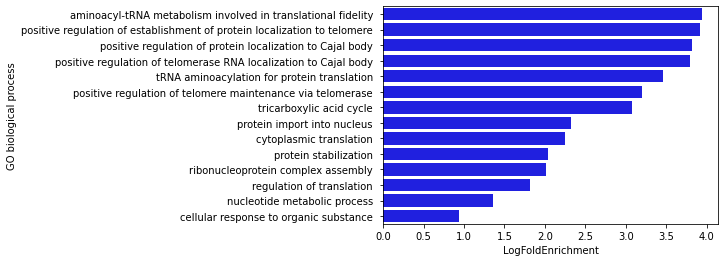

In [25]:
import seaborn as sns
sns.barplot(data=GO_output_sorted_confident_filtered, orient="h", x="LogFoldEnrichment", y="GO biological process", color ="b")

Proteins involved in RA signaling (https://reactome.org/PathwayBrowser/#/R-HSA-5362517&DTAB=MT):

RARG	
RXRG	
RARB	
RXRB	
RXRA	
RARA	
FABP5	
PPARD	
RDH11	
RDH5	
CYP26C1	
AKR1C3	
CRABP1	
ALDH8A1	
ADH4	
ADH1C	
ADH1A	
SDR16C5	
RDH16	
RDH10	
DHRS9	
ALDH1A2	
ALDH1A3	
ALDH1A1	
CYP26B1	
CYP26A1	
RDH13	
DHRS3	
RDH14	
DHRS4	
CRABP2	
CPT1A	
CPT1B	
PDK2	
PDK4	
PDK3	
PDK1	
PDHB	
PDHA2	
PDHA1	
DLAT	
PDHX	
DLD

In [26]:
RA_proteins = ["RARG", "RXRG", "RARB", "RXRB" , "RXRA", "RARA" "FABP5", "PPARD", "RDH11", "RDH5", "CYP26C1", "AKR1C3" ,"CRABP1", "ALDH8A1" ,"ADH4" ,"ADH1C", "ADH1A", "SDR16C5", "RDH16", "RDH10", "DHRS9", "ALDH1A2", "ALDH1A3" , "ALDH1A1" ,"CYP26B1", "CYP26A1", "RDH13", "DHRS3", "RDH14", "DHRS4" ,"CRABP2", "CPT1A", "CPT1B", "PDK2" ,"PDK4" ,"PDK3","PDK1","PDHB","PDHA2", "DHA1", "DLAT", "PDHX" ,"DLD"]
for i in RA_proteins:
    if i in resultcontroldfsorted["Protein"].to_list():
        print(i)

In [29]:
loc = pd.read_csv("results_642AB71A000077E33151D8A8.csv")

In [30]:
loc

,Protein_ID,Localizations,Signals,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
0,sp_Q99460_PSMD1_HUMAN,Cytoplasm,Nuclear export signal,0.5517,0.3232,0.0203,0.3306,0.2363,0.0299,0.2670,0.3325,0.3817,0.0177
1,sp_P50416_CPT1A_HUMAN,Endoplasmic reticulum,Transmembrane domain,0.2513,0.1909,0.0720,0.4190,0.4897,0.0683,0.7614,0.2357,0.4735,0.0996
2,sp_P33991_MCM4_HUMAN,Nucleus,Nuclear localization signal,0.4308,0.8716,0.0418,0.0901,0.1059,0.0401,0.0917,0.0343,0.0485,0.0608
3,sp_P0DMV8_HS71A_HUMAN,Cytoplasm,Nuclear export signal,0.7618,0.3225,0.3118,0.2938,0.2045,0.0255,0.1269,0.3198,0.2391,0.1094
4,sp_Q92841_DDX17_HUMAN,Cytoplasm|Nucleus,Nuclear localization signal,0.5257,0.7312,0.0933,0.0909,0.1116,0.0171,0.1443,0.1645,0.0896,0.0171
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,sp_P61764_STXB1_HUMAN,Cytoplasm,Nuclear export signal,0.6261,0.3486,0.0204,0.3214,0.1201,0.0174,0.2254,0.5647,0.3506,0.0150
118,sp_P28482_MK01_HUMAN,Cytoplasm|Nucleus,Nuclear localization signal|Nuclear export signal,0.6297,0.7513,0.0204,0.2197,0.1198,0.0071,0.1082,0.1168,0.0959,0.0372
119,sp_P50570_DYN2_HUMAN,Cytoplasm,Nuclear export signal,0.6904,0.2365,0.0700,0.3389,0.2167,0.0139,0.2349,0.3979,0.2663,0.1067
120,sp_Q9Y2X3_NOP58_HUMAN,Nucleus,Nuclear localization signal,0.4674,0.7788,0.0782,0.1271,0.1089,0.0100,0.0653,0.0284,0.1089,0.0068


In [31]:
loc["Localizations"] = loc["Localizations"].str.split("|")

In [32]:
loc_exploded = loc.explode("Localizations")

In [33]:
loc_exploded[loc_exploded["Localizations"] == "Mitochondrion"]

,Protein_ID,Localizations,Signals,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
8,sp_P10809_CH60_HUMAN,Mitochondrion,Mitochondrial transit peptide,0.1215,0.1224,0.0331,0.1386,0.8569,0.0054,0.0818,0.0585,0.0870,0.0191
27,sp_P42704_LPPRC_HUMAN,Mitochondrion,Mitochondrial transit peptide,0.1553,0.2080,0.0652,0.0803,0.8822,0.0021,0.0878,0.0633,0.1307,0.0510
62,sp_P34897_GLYM_HUMAN,Mitochondrion,Mitochondrial transit peptide,0.3071,0.1653,0.0504,0.1296,0.9400,0.0026,0.1495,0.1279,0.1465,0.0295
67,sp_Q13423_NNTM_HUMAN,Mitochondrion,Mitochondrial transit peptide,0.1637,0.0486,0.0296,0.1342,0.9039,0.0942,0.2162,0.1371,0.1882,0.0545
71,sp_Q12931_TRAP1_HUMAN,Mitochondrion,Mitochondrial transit peptide,0.2656,0.2125,0.0329,0.1031,0.8825,0.0010,0.0899,0.1086,0.1592,0.0603
77,sp_P40926_MDHM_HUMAN,Mitochondrion,Mitochondrial transit peptide,0.2324,0.0725,0.0236,0.1844,0.9055,0.0169,0.0493,0.0462,0.0450,0.0496
89,sp_P28838_AMPL_HUMAN,Mitochondrion,Mitochondrial transit peptide,0.2092,0.1780,0.0521,0.0595,0.9238,0.0067,0.0790,0.0592,0.0453,0.0253
100,sp_Q99714_HCD2_HUMAN,Mitochondrion,Mitochondrial transit peptide,0.4345,0.2499,0.0374,0.1729,0.8252,0.0109,0.0249,0.2409,0.0272,0.1552
102,sp_P48735_IDHP_HUMAN,Mitochondrion,Mitochondrial transit peptide,0.2617,0.1565,0.0428,0.1447,0.9323,0.0007,0.0592,0.1146,0.1396,0.0822
104,sp_Q00325_MPCP_HUMAN,Mitochondrion,NaN,0.2300,0.1010,0.0671,0.2494,0.7570,0.0323,0.3683,0.0844,0.1647,0.2095


In [36]:
loc_exploded

,Protein_ID,Localizations,Signals,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
0,sp_Q99460_PSMD1_HUMAN,Cytoplasm,Nuclear export signal,0.5517,0.3232,0.0203,0.3306,0.2363,0.0299,0.2670,0.3325,0.3817,0.0177
1,sp_P50416_CPT1A_HUMAN,Endoplasmic reticulum,Transmembrane domain,0.2513,0.1909,0.0720,0.4190,0.4897,0.0683,0.7614,0.2357,0.4735,0.0996
2,sp_P33991_MCM4_HUMAN,Nucleus,Nuclear localization signal,0.4308,0.8716,0.0418,0.0901,0.1059,0.0401,0.0917,0.0343,0.0485,0.0608
3,sp_P0DMV8_HS71A_HUMAN,Cytoplasm,Nuclear export signal,0.7618,0.3225,0.3118,0.2938,0.2045,0.0255,0.1269,0.3198,0.2391,0.1094
4,sp_Q92841_DDX17_HUMAN,Cytoplasm,Nuclear localization signal,0.5257,0.7312,0.0933,0.0909,0.1116,0.0171,0.1443,0.1645,0.0896,0.0171
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,sp_P28482_MK01_HUMAN,Nucleus,Nuclear localization signal|Nuclear export signal,0.6297,0.7513,0.0204,0.2197,0.1198,0.0071,0.1082,0.1168,0.0959,0.0372
119,sp_P50570_DYN2_HUMAN,Cytoplasm,Nuclear export signal,0.6904,0.2365,0.0700,0.3389,0.2167,0.0139,0.2349,0.3979,0.2663,0.1067
120,sp_Q9Y2X3_NOP58_HUMAN,Nucleus,Nuclear localization signal,0.4674,0.7788,0.0782,0.1271,0.1089,0.0100,0.0653,0.0284,0.1089,0.0068
121,sp_P15880_RS2_HUMAN,Cytoplasm,Nuclear localization signal,0.5018,0.5334,0.1522,0.1316,0.1250,0.0333,0.2041,0.0610,0.1171,0.0034


In [46]:
g = loc_exploded.groupby("Localizations").count()

In [53]:
g

,Protein_ID,Signals,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
Localizations,,,,,,,,,,,,
Cell membrane,6,5,6,6,6,6,6,6,6,6,6,6
Cytoplasm,88,76,88,88,88,88,88,88,88,88,88,88
Endoplasmic reticulum,5,5,5,5,5,5,5,5,5,5,5,5
Mitochondrion,13,12,13,13,13,13,13,13,13,13,13,13
Nucleus,48,47,48,48,48,48,48,48,48,48,48,48


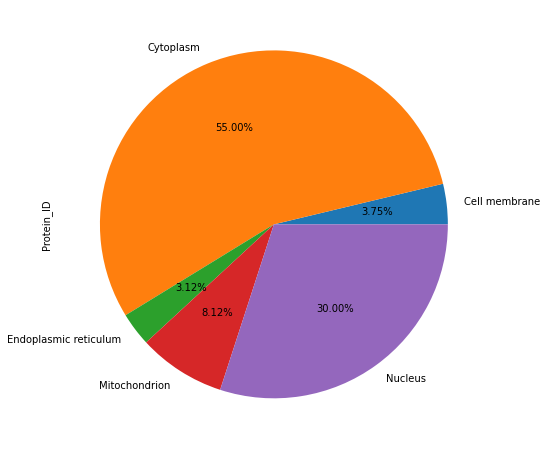

In [61]:
ax = g.plot.pie(y="Protein_ID", legend=False, autopct=lambda x: '{:.2f}%'.format(x), figsize=(8,8))
